### 목포
- 500명의 키와 몸무게, 비만도 라벨을 이용해 비만을 판단하는 모델을 만들어보자

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier #학습 모델 알고리즘
from sklearn import metrics #평가를 위한 모듈

In [4]:
#데이터 가져오기
bmi=pd.read_csv('./bmi_500.csv',index_col='Label')
bmi.head()

,Gender,Height,Weight
Label,,,
Obesity,Male,174,96
Normal,Male,189,87
Obesity,Female,185,110
Overweight,Female,195,104
Overweight,Male,149,61


In [5]:
#전체 행, 결측치 여부, 컬럼별 정보
bmi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, Obesity to Extreme Obesity
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 15.6+ KB


In [6]:
#기술(요약) 통계량 확인
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


In [8]:
#인덱스의 중복을 제거한 값 확인하기
bmi.index.unique()

Index(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'],
      dtype='object', name='Label')

### 각 비만도 등급별로 시각화

In [10]:
#Label이 Normal인 데이터 가져오기(loc,iloc 인덱서 활용)
bmi.loc['Normal',:]

,Gender,Height,Weight
Label,,,
Normal,Male,189,87
Normal,Male,195,81
Normal,Male,155,51
Normal,Male,191,79
Normal,Female,172,67
...,...,...,...
Normal,Female,178,65
Normal,Male,167,64
Normal,Female,151,55


In [13]:
#label별 색을 넣어주는 함수 정의
def myScatter(label, color) :
    tmp=bmi.loc[label]
    plt.scatter(tmp['Weight'],
               tmp['Height'],
               c=color,
               label=label)

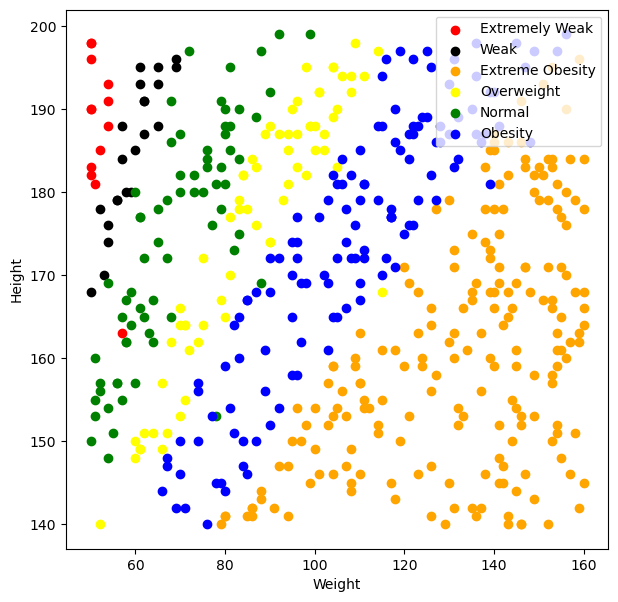

In [16]:
plt.figure(figsize=(7,7))
myScatter('Extremely Weak','red')
myScatter('Weak','black')
myScatter('Extreme Obesity','orange')
myScatter('Overweight','yellow')
myScatter('Normal','green')
myScatter('Obesity','blue')

plt.legend(loc='upper right') #범주 설정
plt.xlabel('Weight') #x축 이름
plt.ylabel('Height') #y축 이름

plt.show()

Index(['Obesity', 'Normal', 'Obesity', 'Overweight', 'Overweight',
       'Overweight', 'Extreme Obesity', 'Extreme Obesity', 'Overweight',
       'Obesity',
       ...
       'Normal', 'Extreme Obesity', 'Extremely Weak', 'Weak',
       'Extreme Obesity', 'Extreme Obesity', 'Obesity', 'Extreme Obesity',
       'Extreme Obesity', 'Extreme Obesity'],
      dtype='object', name='Label', length=500)

### 모델링
1. 문제와 답으로 분리
2. 훈련셋과 평가셋으로 분리
3. 모델을 생성, 하이퍼파라미터 조정
4. 학습 및 평가

In [18]:
data=pd.read_csv('./bmi_500.csv')
data.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


In [19]:
#문제(Height, Weight)데이터 -> X 
#답데이터(label) -> Y
X=data[['Height','Weight']]
Y=data['Label']

In [27]:
#크기/모양 확인하기
display(X.shape)
display(Y.shape)

(500, 2)

(500,)

In [31]:
#훈련셋과 테스트셋으로 나누기
#훈련셋 : 데스트셋 = 7:3
#X_train(0~349),X_test(350~),Y_train(0~349),Y_test(350~)
X_train=X.iloc[:350,:]
X_test=X.iloc[350:,:]
Y_train=Y[:350]
Y_test=Y[350:]

In [35]:
#각 데이터 크기 확인
display(X_train.shape)
display(X_test.shape)
display(Y_train.shape)
display(Y_test.shape)

(350, 2)

(150, 2)

(350,)

(150,)

In [37]:
#모델 생성
#하이퍼파라미터 튜닝
knn_model=KNeighborsClassifier(n_neighbors=10)

In [38]:
#학습/훈련 진행
#모델명.fit(훈련용문제,훈련용답)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [40]:
#예측 진행
#모델명.predict(테스트용문제)
pre=knn_model.predict(X_test)

In [41]:
#성능 평가
metrics.accuracy_score(pre,Y_test)

0.94

### 활용하기

In [43]:
#새로운 미지의 데이터 예측하기
knn_model.predict([[178,69],[180,58],[162,70]])

C:\Users\smhrd\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Normal', 'Weak', 'Overweight'], dtype=object)